In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [ ]:
# loading dataset

df = pd.read_csv("../data/raw/data.csv")
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
# Basic Overview

df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


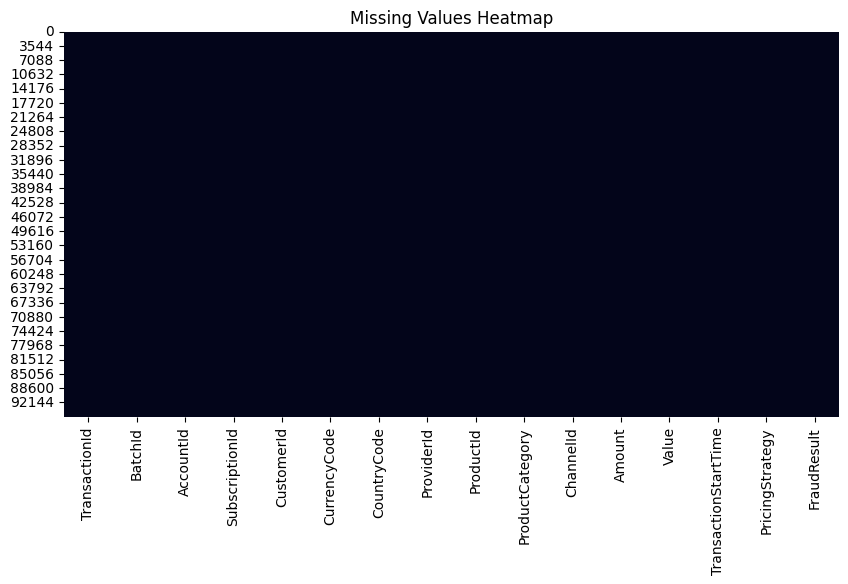

In [ ]:
# Missing Values

missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()



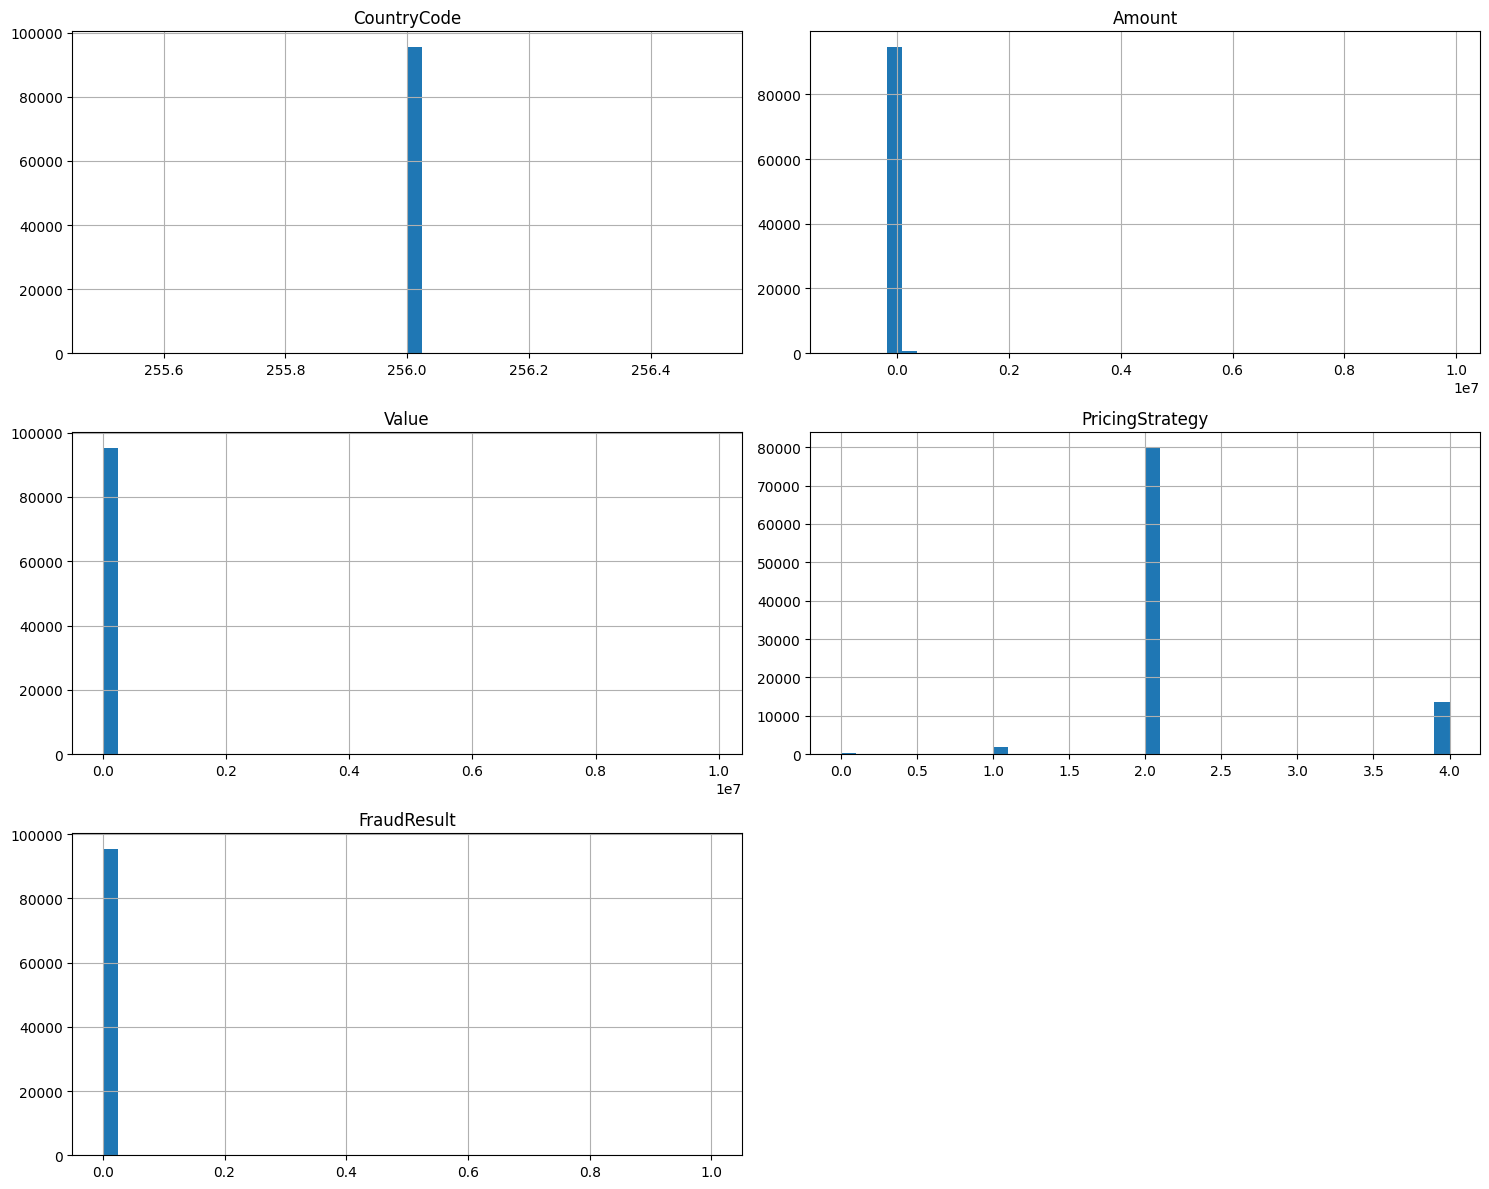

In [ ]:
# Numerical Feature Distributions

num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=40, figsize=(15, 12))
plt.tight_layout()
plt.show()


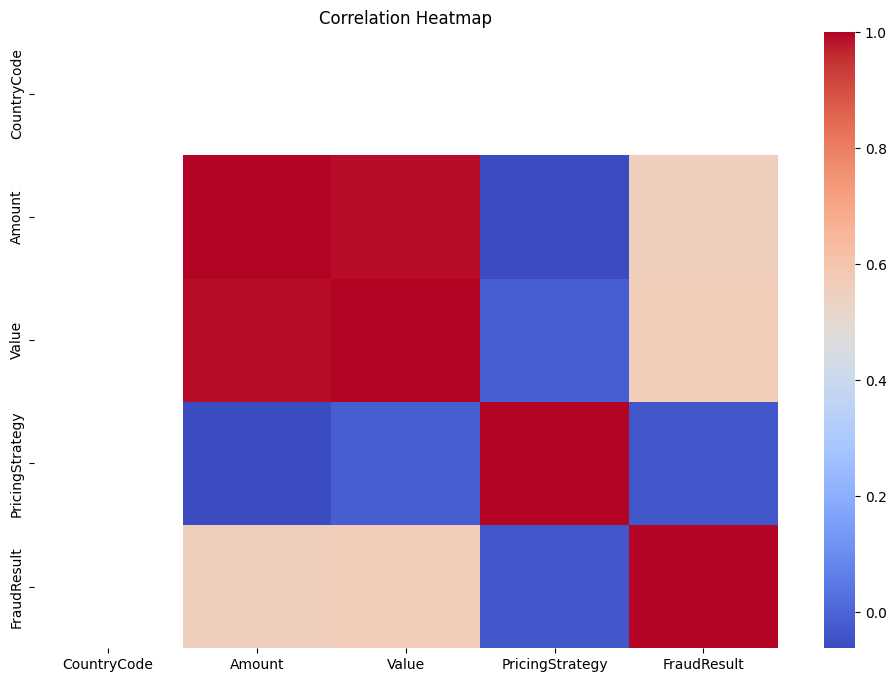

In [ ]:
# correlation analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np

df = pd.read_csv("../data/raw/data.csv")  
df.head()

num_cols = df.select_dtypes(include=np.number).columns
num_cols

plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


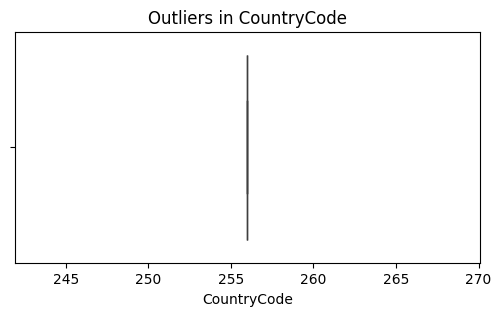

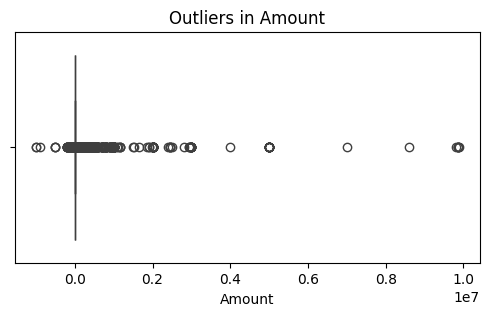

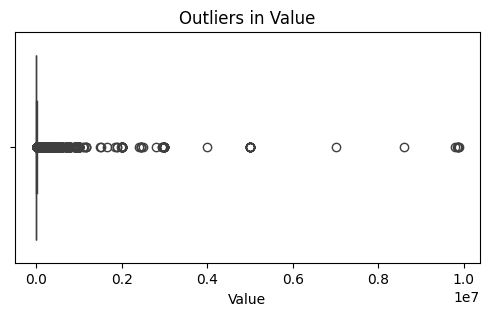

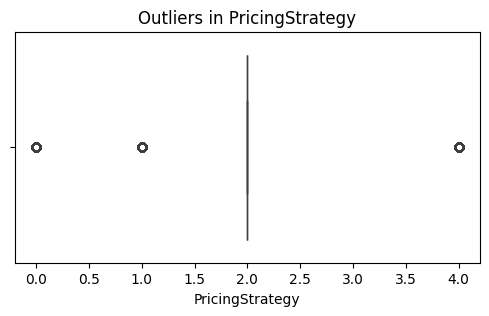

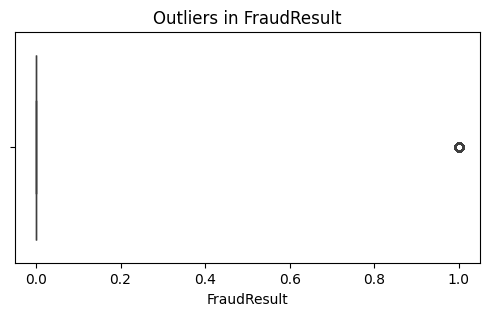

In [ ]:

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values


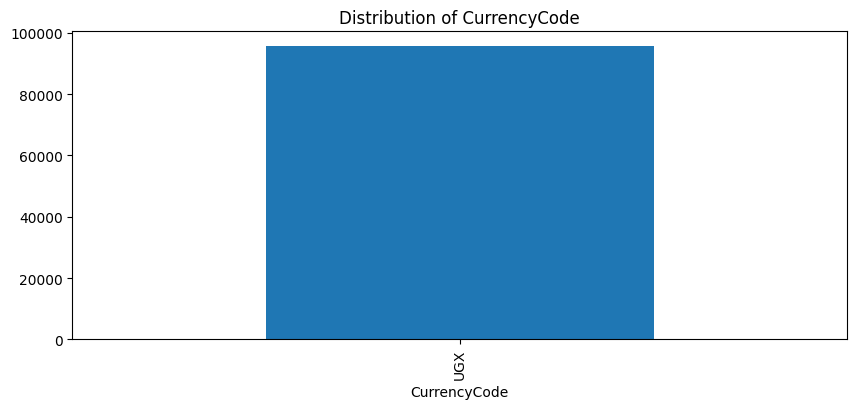

ProviderId: 6 unique values


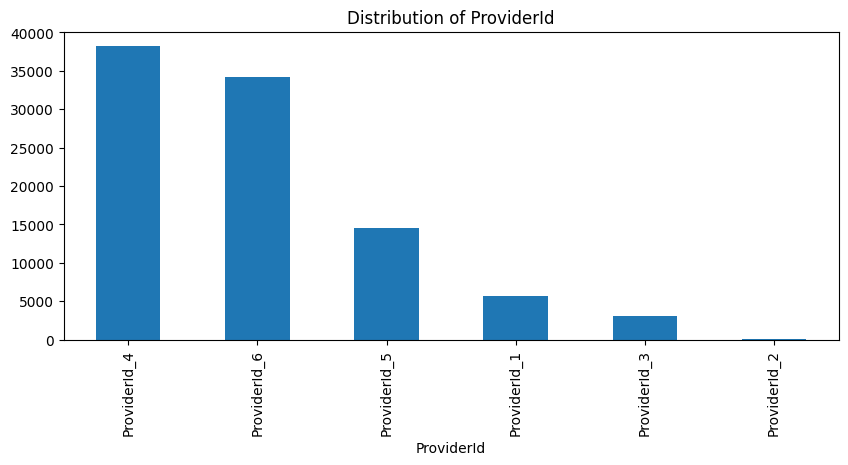

ProductId: 23 unique values
ProductCategory: 9 unique values


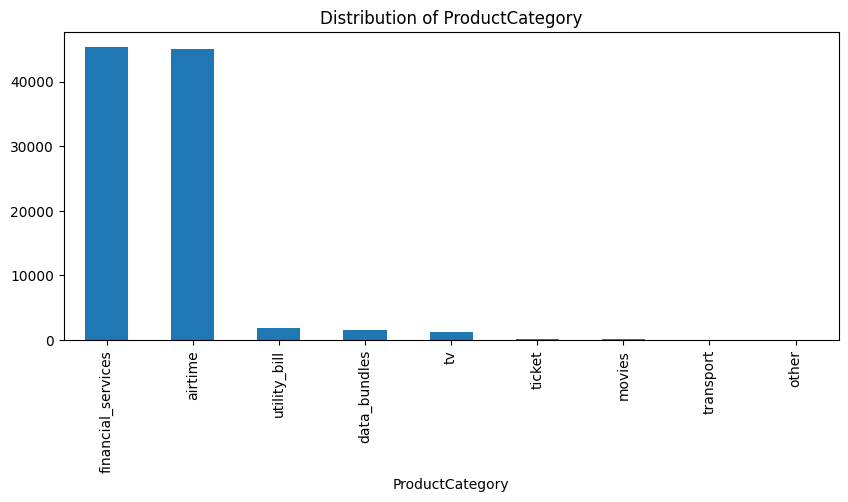

ChannelId: 4 unique values


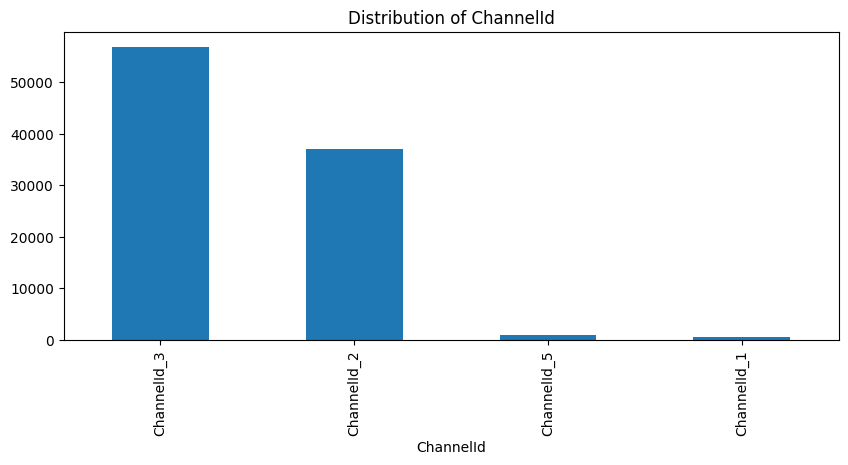

TransactionStartTime: 94556 unique values


In [ ]:
# Categorical Feature Distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/data.csv")  
df.head()
 
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

    if unique_vals <= 15:
        plt.figure(figsize=(10,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col}")
        plt.show()



In [15]:
# =========================================
# Save All EDA Visualizations
# =========================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# Setup
# -----------------------------------------
SAVE_DIR = "../reports/figures"
os.makedirs(SAVE_DIR, exist_ok=True)
sns.set(style="whitegrid")

# -----------------------------------------
# Load the data
# -----------------------------------------
df = pd.read_csv("../data/raw/data.csv")  

# -----------------------------------------
# Numeric and categorical columns
# -----------------------------------------
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# -----------------------------------------
# 1. Missing values heatmap
# -----------------------------------------
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/missing_values_heatmap.png")
plt.close()

# -----------------------------------------
# 2. Correlation heatmap
# -----------------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/correlation_heatmap.png")
plt.close()

# -----------------------------------------
# 3. Numerical distributions (histograms)
# -----------------------------------------
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/{col}_distribution.png")
    plt.close()

# -----------------------------------------
# 4. Numerical boxplots (outliers)
# -----------------------------------------
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/{col}_boxplot.png")
    plt.close()

# -----------------------------------------
# 5. Categorical distributions (low-cardinality only)
# -----------------------------------------
for col in cat_cols:
    if df[col].nunique() <= 15:
        plt.figure(figsize=(10,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.savefig(f"{SAVE_DIR}/{col}_distribution.png")
        plt.close()

print("✅ All 12 (or more) visualizations saved in 'reports/figures/' folder")


✅ All 12 (or more) visualizations saved in 'reports/figures/' folder
